For this project, you will analyze data on GDP and life expectancy from the World Health Organization and the World Bank to try and identify the relationship between the GDP and life expectancy of six countries.

During this project, you will analyze, prepare, and plot data in order to answer questions in a meaningful way.

After you perform your analysis, you’ll be creating a blog post to share your findings on the World Health Organization website.


###Project Objectives:
Complete a project to add to your portfolio
Use seaborn and Matplotlib to create visualizations
Become familiar with presenting and sharing data visualizations
Preprocess, explore, and analyze data

###Prerequisites:
* Data Acquisition
* Data Visualization
* Hypothesis Testing
* Summarizing Quantitative Data
* Data Wrangling and Tidying
* Data Manipulation with Pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Import data and convert it to a pandas dataframe. Print the first 5 rows
df = pd.read_csv('all_data.csv')
print(df.head(5))

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


In [3]:
#Check datatypes
df.dtypes

Country                              object
Year                                  int64
Life expectancy at birth (years)    float64
GDP                                 float64
dtype: object

In [4]:
#Print unique countries in the dataframe
print(df.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [5]:
#Print unique year in the dataframe
print(df.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


In [6]:
df = df.rename({'Life expectancy at birth (years)': 'LEABY'}, axis='columns')
print(df.head(5))

  Country  Year  LEABY           GDP
0   Chile  2000   77.3  7.786093e+10
1   Chile  2001   77.3  7.097992e+10
2   Chile  2002   77.8  6.973681e+10
3   Chile  2003   77.9  7.564346e+10
4   Chile  2004   78.0  9.921039e+10


In [7]:
#Provide dataframe statistics
df.describe()

,Year,LEABY,GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


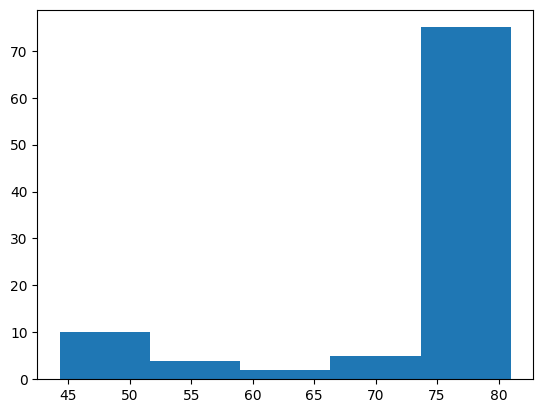

In [77]:
#Visualize Life expectancy using a histogram
plt.hist(x=df['LEABY'], bins=5)
plt.show()

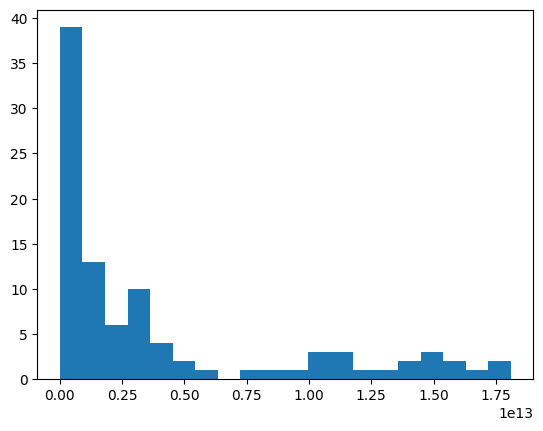

In [78]:
#Visualize GDP  using a histogram
plt.hist(x=df['GDP'], bins=20)
plt.show()

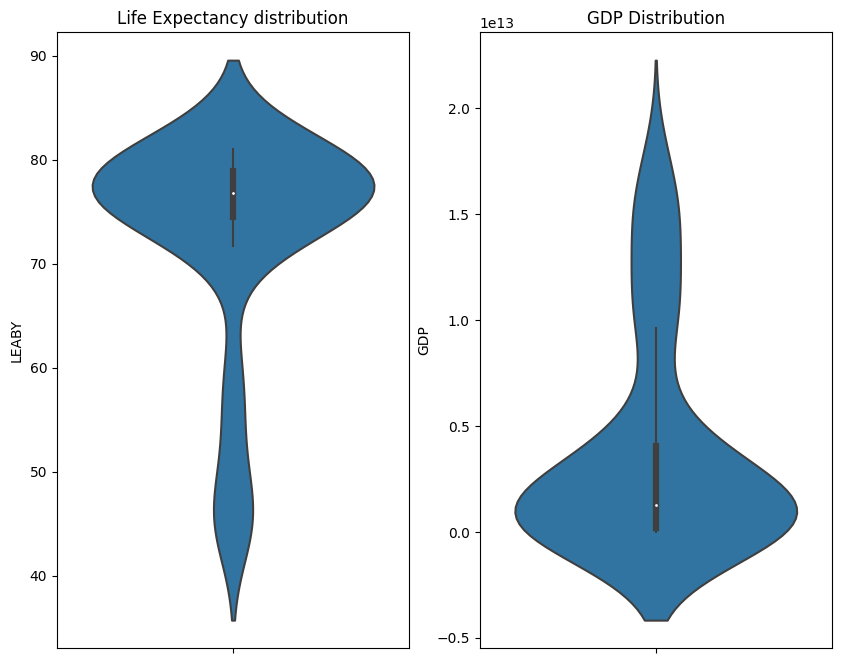

In [79]:
#Create a violinplot for both GDP and Life Expectancy. Use subplots to visualize both graphs next to eachother
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
sns.violinplot(y=df['LEABY'])
plt.title('Life Expectancy distribution')
plt.subplot(1, 2, 2)
sns.violinplot(y=df['GDP'])
plt.title('GDP Distribution')
plt.show()

/var/folders/98/1d6h1tfd4896ldm_dcc89ws00000gn/T/ipykernel_2006/1097682450.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df.GDP, rug=True, kde=False)
/var/folders/98/1d6h1tfd4896ldm_dcc89ws00000gn/T/ipykernel_2006/1097682450.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df.LEABY

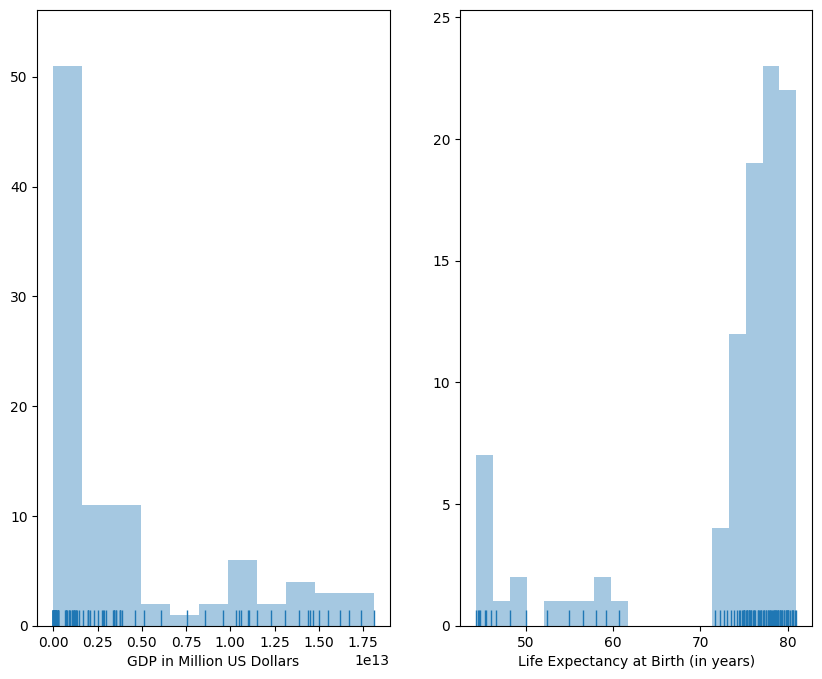

In [80]:
#Create two subplots showcasing the distribution of GDP and LEABY respectively
plt.figure(figsize=(10,8))

#Subplot 1 - Distribution of GDP
plt.subplot(1, 2, 1)
sns.distplot(x=df.GDP, rug=True, kde=False)
plt.xlabel('GDP in Million US Dollars')

#Subplot 2 - Distribution of LEABY
plt.subplot(1, 2, 2)
sns.distplot(x=df.LEABY, rug=True, kde=False)
plt.xlabel('Life Expectancy at Birth (in years)')

#Show plot
plt.show()

In [81]:
#Aggregate the data by mean and group it by country
dfmean = df.drop('Year', axis=1).groupby('Country').mean().reset_index()

In [82]:
dfmean

,Country,LEABY,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


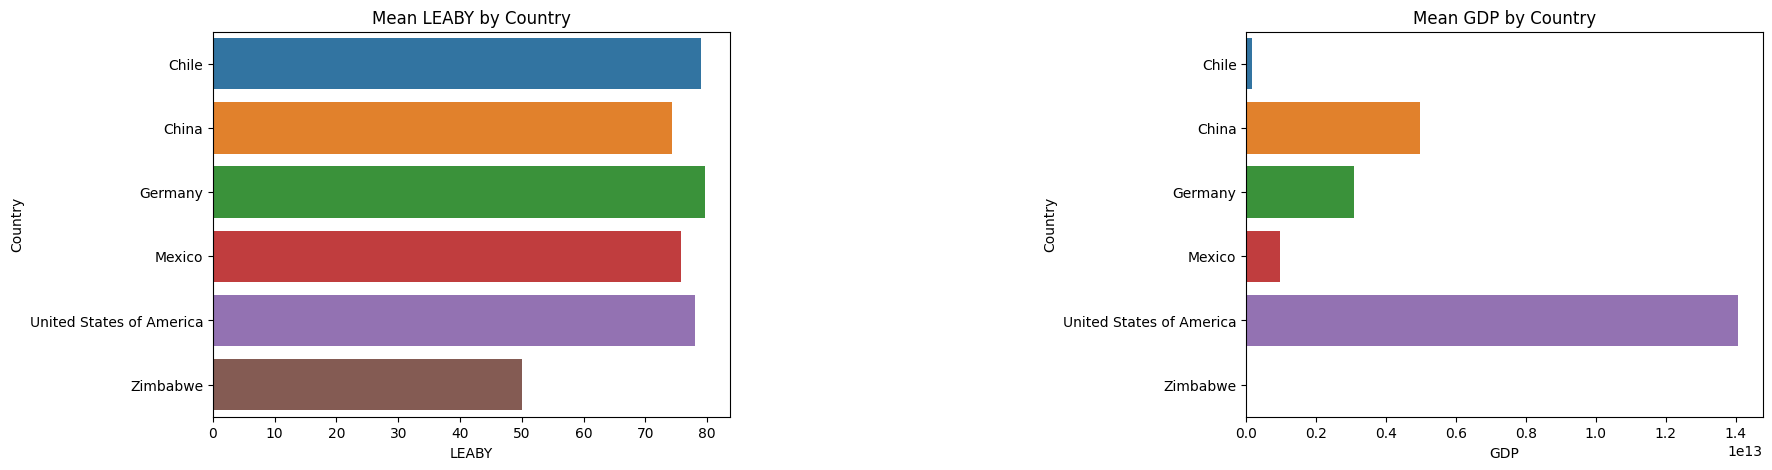

In [83]:
#Create two barchart of GDP and LEABY Grouped by Country
plt.figure(figsize=(20, 5))

#Subplot 1 - LEABY
plt.subplot(1, 2, 1)
sns.barplot(x='LEABY', y='Country', data=dfmean)
plt.title('Mean LEABY by Country')

#Subplot 2 - GDP
plt.subplot(1, 2, 2)
sns.barplot(x='GDP', y='Country', data=dfmean)
plt.title('Mean GDP by Country')

#Adjust width between the two subplots
plt.subplots_adjust(wspace=1)

#Show plot
plt.show()

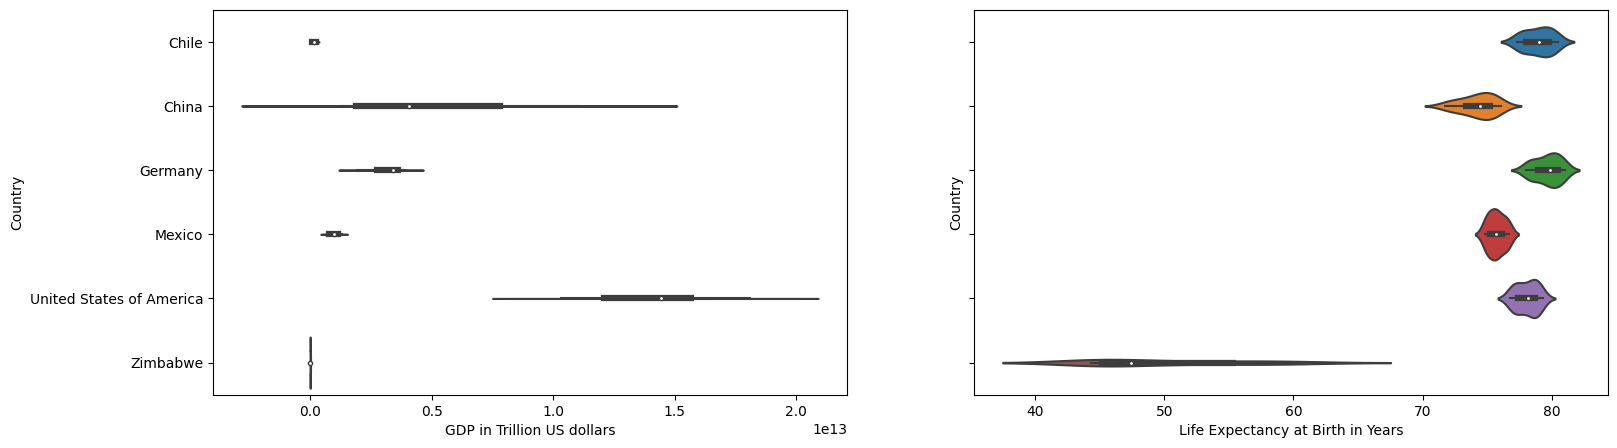

In [84]:
#Visualize distributions using violinplots on axis'
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(18, 5))

#Subplot 1
axes[0] = sns.violinplot(ax=axes[0], x=df.GDP, y=df.Country)
axes[0].set_xlabel('GDP in Trillion US dollars')

#Subplot 2
axes[1] = sns.violinplot(ax=axes[1], x=df.LEABY, y=df.Country)
axes[1].set_xlabel('Life Expectancy at Birth in Years')

#Show plto
plt.show()

/Users/henrik/PycharmProjects/pythonProject/openBB/venv/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/henrik/PycharmProjects/pythonProject/openBB/venv/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[]

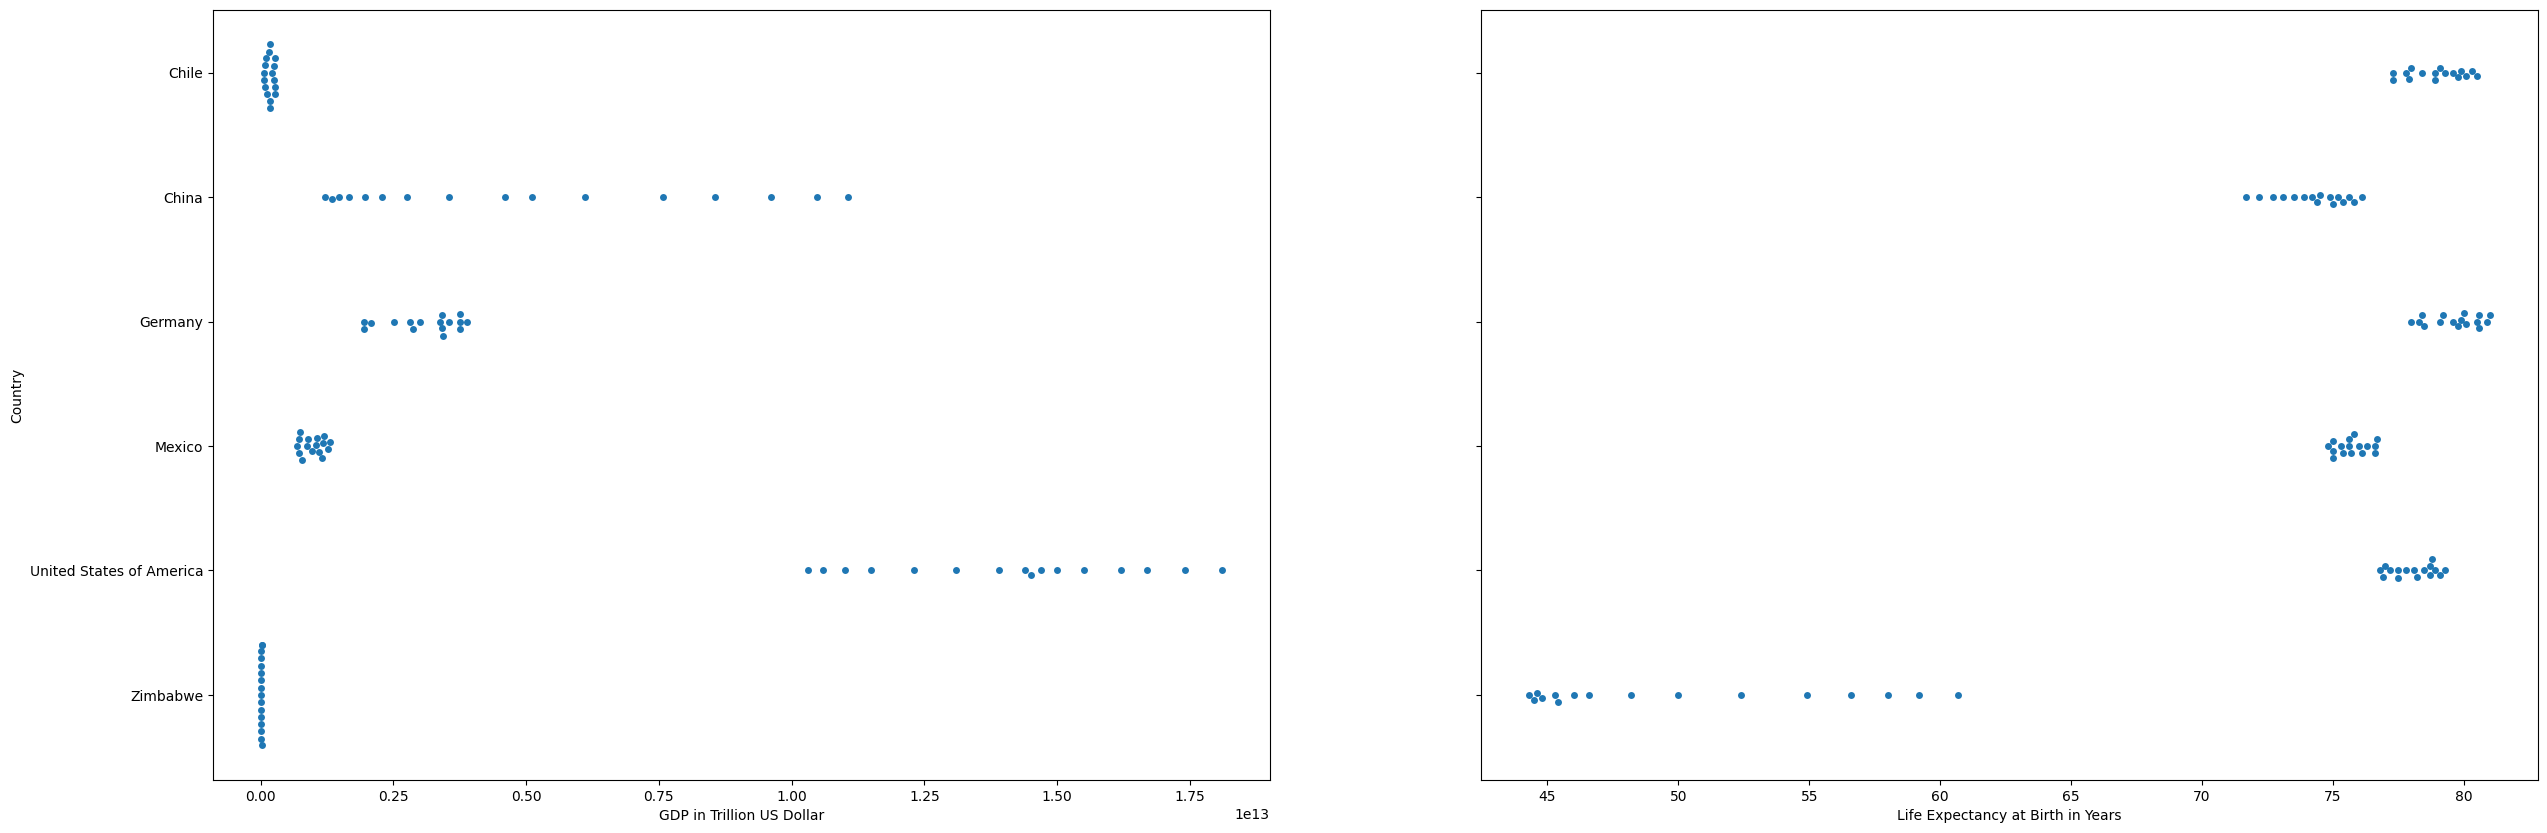

In [85]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(30, 10))

#Subplot 1
axes[0] = sns.swarmplot(ax=axes[0], x=df.GDP, y=df.Country)
axes[0].set_xlabel('GDP in Trillion US Dollar')

#Subplot 2
axes[1] = sns.swarmplot(ax=axes[1], x=df.LEABY, y=df.Country)
axes[1].set_xlabel('Life Expectancy at Birth in Years')

#show plot
plt.plot()

/Users/henrik/PycharmProjects/pythonProject/openBB/venv/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 37.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/henrik/PycharmProjects/pythonProject/openBB/venv/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/henrik/PycharmProjects/pythonProject/openBB/venv/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 37.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/henrik/PycharmProjects/pythonProject/openBB/venv/lib/python3.8/site-packages/seaborn/categorical.py:3540: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the 

[]

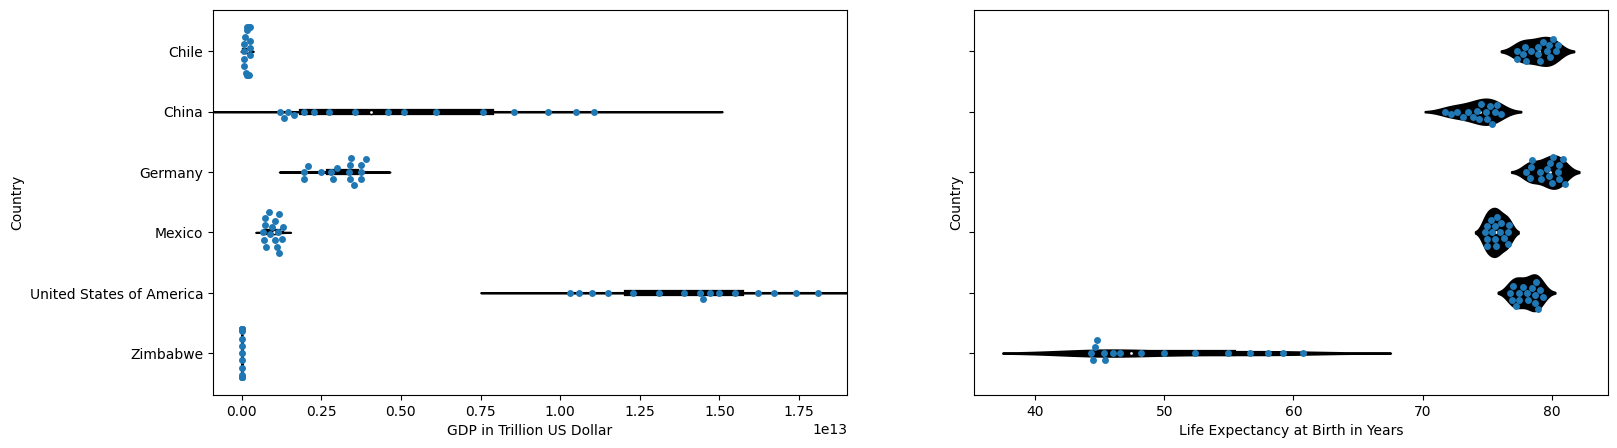

In [86]:
#Combine the violinplot and swarmplot for both visualisations
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(18, 5))

#Subplot 1
axes[0] = sns.violinplot(ax=axes[0], x=df.GDP, y=df.Country, color='black')
axes[0] = sns.swarmplot(ax=axes[0], x=df.GDP, y=df.Country)
axes[0].set_xlabel('GDP in Trillion US Dollar')

#Subplot 2
axes[1] = sns.violinplot(ax=axes[1], x=df.LEABY, y=df.Country, color='black')
axes[1] = sns.swarmplot(ax=axes[1], x=df.LEABY, y=df.Country)
axes[1].set_xlabel('Life Expectancy at Birth in Years')

#show plot
plt.plot()